In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Загрузка данных
births_df = pd.read_csv('data/daily-total-female-births-in-cal.csv')
births_df['Date'] = pd.to_datetime(births_df['Date'])
births_df.set_index('Date', inplace=True)

sales_df = pd.read_csv('data/monthly-sales-of-company-x-jan-6.csv')
sales_df['Month'] = pd.to_datetime(sales_df['Month'])
sales_df.set_index('Month', inplace=True)

In [3]:
# ADF-тест
def check_stationarity(series, name="Ряд"):
    result = adfuller(series)
    print(f"{name}: p-value = {result[1]:.5f}")
    return result[1] < 0.05

print("ADF Test Results:")
births_stationary = check_stationarity(births_df['Count'], "Ряд рождаемости")
sales_stationary = check_stationarity(sales_df['Count'], "Ряд продаж")


ADF Test Results:
Ряд рождаемости: p-value = 0.00005
Ряд продаж: p-value = 0.98889


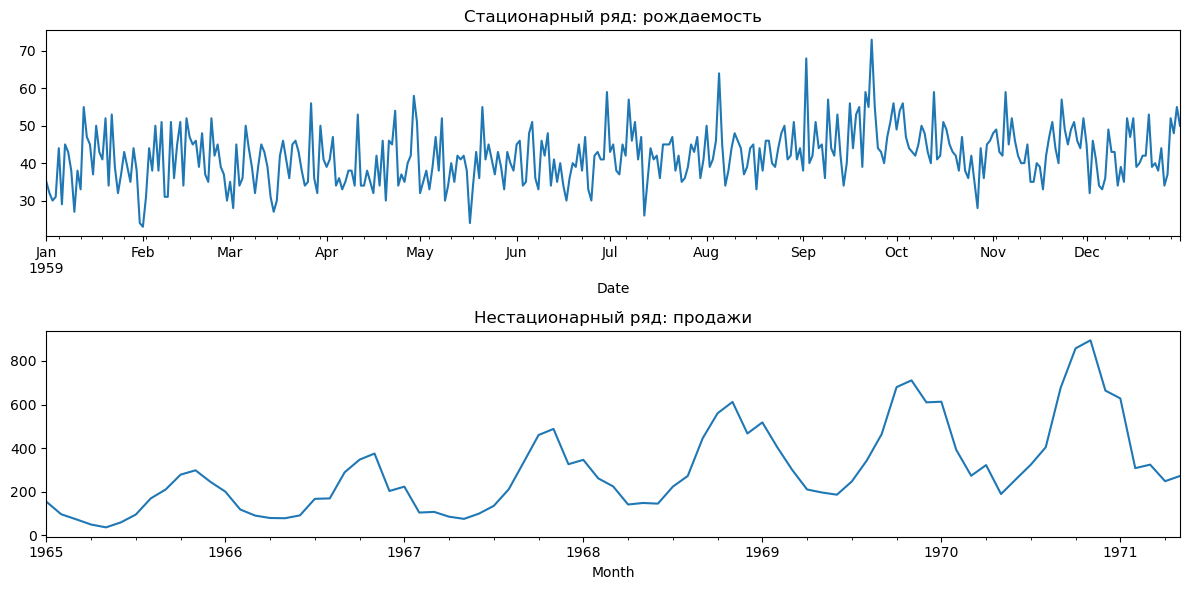

In [4]:
# Визуализация
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=False)
births_df['Count'].plot(ax=ax[0], title='Стационарный ряд: рождаемость')
sales_df['Count'].plot(ax=ax[1], title='Нестационарный ряд: продажи')
plt.tight_layout()
plt.show()

In [5]:
# MA модель
def fit_ma_model(series, q=1, title="MA модель"):
    model = ARIMA(series, order=(0, 0, q)).fit()
    forecast = model.predict()
    plt.figure(figsize=(12, 4))
    plt.plot(series, label='Оригинал')
    plt.plot(forecast, label=f'MA({q}) Предсказание', linestyle='--')
    plt.title(title)
    plt.legend()
    plt.show()
    mse = mean_squared_error(series[q:], forecast[q:])
    print(f"MSE для MA({q}) модели: {mse:.2f}")
    return model

Стационарный ряд:


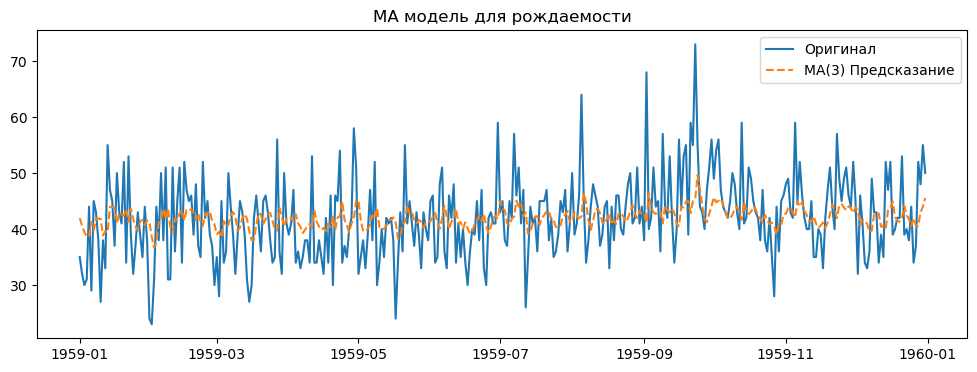

MSE для MA(3) модели: 50.56
Нестационарный ряд:


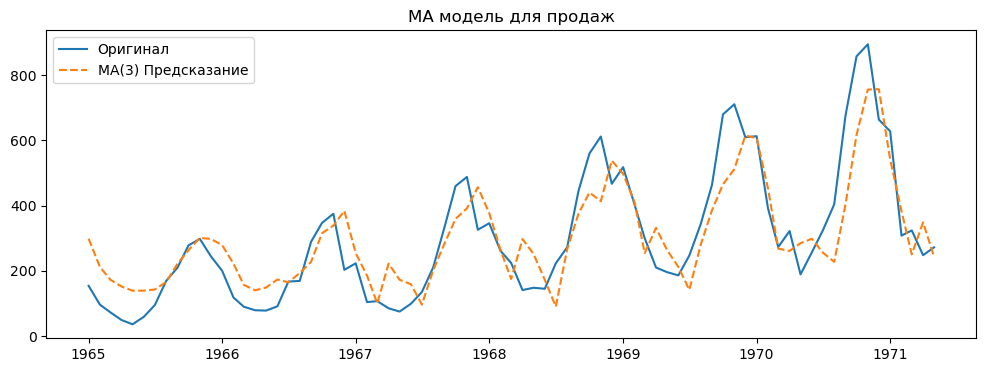

MSE для MA(3) модели: 9246.38


In [6]:
# Применение моделей
print("Стационарный ряд:")
ma_births_model = fit_ma_model(births_df['Count'], q=3, title="MA модель для рождаемости")

print("Нестационарный ряд:")
ma_sales_model = fit_ma_model(sales_df['Count'], q=3, title="MA модель для продаж")

In [7]:
# Выводы
print("🔍 Выводы:")
print("""
1. Ряд рождаемости — стационарен (p-value < 0.05), что делает его пригодным для модели MA без дифференцирования.
2. Ряд продаж — нестационарен (p-value > 0.05), но всё ещё можно приближать MA моделью, хотя это не оптимально.
3. MA модель лучше работает для стационарного ряда, ошибки на ряде рождаемости ниже.
4. MA модель использует только шум (ошибки), и плохо захватывает тренд, который присутствует в ряде продаж.
5. Для нестационарных рядов лучше использовать ARIMA с компонентом дифференцирования (d > 0).
""")

🔍 Выводы:

1. Ряд рождаемости — стационарен (p-value < 0.05), что делает его пригодным для модели MA без дифференцирования.
2. Ряд продаж — нестационарен (p-value > 0.05), но всё ещё можно приближать MA моделью, хотя это не оптимально.
3. MA модель лучше работает для стационарного ряда, ошибки на ряде рождаемости ниже.
4. MA модель использует только шум (ошибки), и плохо захватывает тренд, который присутствует в ряде продаж.
5. Для нестационарных рядов лучше использовать ARIMA с компонентом дифференцирования (d > 0).

